In [3]:
##for question 14
import numpy as np

#main
data_in = np.genfromtxt("hw3_train.dat.txt")

X = data_in[:, : -1]
y = data_in[:, -1]
X = np.c_[(1 * np.ones(X.shape[0]), X)]

X_p = np.linalg.pinv(X)
w_lin = X_p.dot(y)
E_in_sqr = 0
tmp_s = np.inner(X, w_lin)-y
E_in_sqr = np.linalg.norm(tmp_s)**2/X.shape[0]
print("E_in = ", E_in_sqr)


E_in =  0.6053223804672918


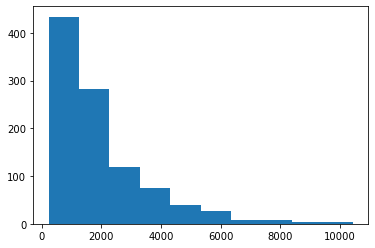

The average number of iteration is :  1902.81


In [4]:
##for question 15
import numpy as np
import random
import py_compile
import matplotlib.pyplot as plt

#main
data = np.genfromtxt("hw3_train.dat.txt")

result = []
X = data[:, : -1]
y = data[:, -1]
y = y.reshape([X.shape[0], 1])
X = np.c_[(1 * np.ones(X.shape[0]), X)]
X_p = np.linalg.pinv(X)
w_lin = X_p.dot(y)

E_in_sqr = 0
for i in range(X.shape[0]):
    x_i = np.array(X[i, :])
    x_i = x_i.reshape((1, X.shape[1]))
    E_in_sqr += (np.dot(x_i,w_lin) - y[i]) * (np.dot(x_i,w_lin) - y[i])

E_in_sqr /= X.shape[0]
#print(E_in_sqr)

for i in range(1000):
    w = np.zeros((X.shape[1], 1), np.float)
    t = 0 #count the number of iteration
    #print(i)
    while True:
        t += 1
        k = random.randint(0, X.shape[0]-1)
        x_k = np.array(X[k, :])
        x_k = x_k.reshape((1, X.shape[1]))

        w_gradient=np.zeros(shape=(X.shape[1], 1))
        prediction=np.dot(x_k, w)
        w_gradient = (-2)*(y[k]-(prediction)) * x_k.T
 
        w = w -  0.001 * w_gradient
        
        w_s = np.squeeze(w)
        y = np.squeeze(y)
        temp = np.inner(X, w_s) - y
        E_in = np.linalg.norm(temp)**2
        E_in /= X.shape[0]
        
        if E_in <= 1.01 * E_in_sqr:
            #print(t)
            break
                      
    result.append(t)
                  
plt.hist(result)
plt.show()
print("The average number of iteration is : ", np.mean(result))

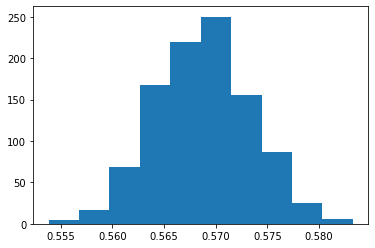

The average E_in_500 is :  0.5687996150790591


In [374]:
##for question 16
import numpy as np
import random
import py_compile
import math
import matplotlib.pyplot as plt

#main
data = np.genfromtxt("hw3_train.dat.txt")

result = []
X = data[:, : -1]
y = data[:, -1]
y = y.reshape([X.shape[0], 1])
X = np.c_[(1 * np.ones(X.shape[0]), X)]
X_p = np.linalg.pinv(X)
w_lin = X_p.dot(y)

E_in_sqr = 0
for i in range(X.shape[0]):
    x_i = np.array(X[i, :])
    x_i = x_i.reshape((1, X.shape[1]))
    E_in_sqr += (np.dot(x_i,w_lin) - y[i]) * (np.dot(x_i,w_lin) - y[i])

E_in_sqr /= X.shape[0]
#print(E_in_sqr)

for i in range(1000):
    w = np.zeros((X.shape[1], 1), np.float)
    t = 0 #count the number of iteration

    for j in range(500):
        t += 1
        k = random.randint(0, X.shape[0]-1)
        x_k = np.array(X[k, :])
        x_k = x_k.reshape((1, X.shape[1]))
    
        s = -y[k] * np.dot(x_k, w)
        w = w +  0.001 / (1 + math.exp(-s))  * y[k] * x_k.T
    
    E_in = 0
    s = np.dot(X, w)
    for j in range(X.shape[0]):
        E_in += math.log((1 + math.exp(-y[j]*s[j])),math.e)
    E_in /= X.shape[0]
    result.append(E_in)
          
plt.hist(result)
plt.show()
print("The average E_in_500 is : ", np.mean(result))

[[0.60532238]]


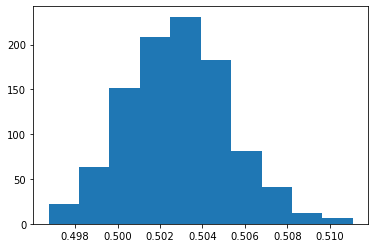

The average E_in_500 is :  0.5028538554465445


In [373]:
##for question 17
import numpy as np
import random
import py_compile
import math
import matplotlib.pyplot as plt

#main
data = np.genfromtxt("hw3_train.dat.txt")

result = []
X = data[:, : -1]
y = data[:, -1]
y = y.reshape([X.shape[0], 1])
X = np.c_[(1 * np.ones(X.shape[0]), X)]
X_p = np.linalg.pinv(X)
w_lin = X_p.dot(y)

E_in_sqr = 0
for i in range(X.shape[0]):
    x_i = np.array(X[i, :])
    x_i = x_i.reshape((1, X.shape[1]))
    E_in_sqr += (np.dot(x_i,w_lin) - y[i]) * (np.dot(x_i,w_lin) - y[i])

E_in_sqr /= X.shape[0]
#print(E_in_sqr)

for i in range(1000):
    w = w_lin
    t = 0 #count the number of iteration
    
    for j in range(500):
        t += 1
        k = random.randint(0, X.shape[0]-1)
        x_k = np.array(X[k, :])
        x_k = x_k.reshape((1, X.shape[1]))
    
        s = -y[k] * np.dot(x_k, w)
        w = w +  0.001 / (1 + math.exp(-s))  * y[k] * x_k.T
    
    E_in = 0
    s = np.dot(X, w)
    
    for j in range(X.shape[0]):
        E_in += math.log((1 + math.exp(-y[j]*s[j])),math.e)
    E_in /= X.shape[0]
    #print(E_in)
    result.append(E_in)
          
plt.hist(result)
plt.show()
print("The average E_in_500 is : ", np.mean(result))

In [371]:
##for question 18
import numpy as np

#main
data_in = np.genfromtxt("hw3_train.dat.txt")

X = data_in[:, : -1]
y = data_in[:, -1]
X = np.c_[(1 * np.ones(X.shape[0]), X)]

X_p = np.linalg.pinv(X)
w_lin = X_p.dot(y)
s = np.dot(X, w_lin)

E_in = 0
for i in range (X.shape[0]):
    if(np.sign(s[i]) != y[i]):
        E_in += 1 
E_in /= X.shape[0]

data_out = np.genfromtxt("hw3_test.dat.txt")
X_out = data_out[:, : -1]
y_out = data_out[:, -1]
X_out = np.c_[(1 * np.ones(X_out.shape[0]), X_out)]
s_out = np.dot(X_out, w_lin)

E_out = 0
for i in range (X_out.shape[0]):
    if(np.sign(s_out[i]) != y_out[i]):
        E_out += 1 
E_out /= X_out.shape[0]
print("|E_in - E_out| = ", abs(E_in - E_out))

|E_in - E_out| =  0.3226666666666666


In [2]:
##for question 19&20
import numpy as np
import math

#main
n = input('Q = ')
n= int(n)

data_in = np.genfromtxt("hw3_train.dat.txt")

X = data_in[:, : -1]
d = X.shape[1]
y = data_in[:, -1]
X = np.c_[(1 * np.ones(X.shape[0]), X)]

X_poly = X
for i in range((n - 1)*d):
    exp = math.floor(i / d) + 2
    add = np.power(X_poly[:, i%d+1], exp)
    X_poly = np.insert(X_poly, X_poly.shape[1], values=add, axis=1)

X_p = np.linalg.pinv(X_poly)
w_lin = X_p.dot(y)

s = np.dot(X_poly, w_lin)
E_in = 0
for i in range (X.shape[0]):
    if(np.sign(s[i]) != np.sign(y[i])):
        E_in += 1 
E_in /= X.shape[0]
print("E_in = ", E_in)

data_out = np.genfromtxt("hw3_test.dat.txt")
X_out = data_out[:, : -1]
y_out = data_out[:, -1]
X_out = np.c_[(1 * np.ones(X_out.shape[0]), X_out)]

X_out_poly = X_out
for i in range((n - 1)*d):
    exp = math.floor(i / d) + 2
    add = np.power(X_out_poly[:, i%d+1], exp)
    X_out_poly = np.insert(X_out_poly, X_out_poly.shape[1], values=add, axis=1)

s_out = np.dot(X_out_poly, w_lin)
E_out = 0
for i in range (X_out.shape[0]):
    if(np.sign(s_out[i]) != np.sign(y_out[i])):
        E_out += 1 
E_out /= X_out.shape[0]
print("E_out = ", E_out)
print("|E_in - E_out| = ", abs(E_in - E_out))


Q = 10
E_in =  0.049
E_out =  0.49566666666666664
|E_in - E_out| =  0.44666666666666666
